# News topic modelling

The goal of this notebook is to explore a kagglw news dataset and discover its topics asserting these topics have sense from a human prespective

## Loading data and models 
Best gridsearch combination of hyperparameters results & visualitzation

In [96]:
import matplotlib.pyplot as plt
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
import pandas as pd
import numpy as np
import joblib
import pickle
%matplotlib inline

In [133]:
# Loading raw data
data_filename = "../../data/articles1.csv"
data = pd.read_csv(data_filename)
print(data.shape)
data

(50000, 10)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [97]:
# Loading vectorizer
with open("../../data/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7fe4f01e10c8>, vocabulary=None)

In [98]:
# Loading LDA model
with open("../src/lda_grid_model.pkl", "rb") as f:
    model = pickle.load(f)
model

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=12,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'learning_decay': [0.7], 'n_components': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Visualitzations

/home/centos/anaconda2/envs/exploration_python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


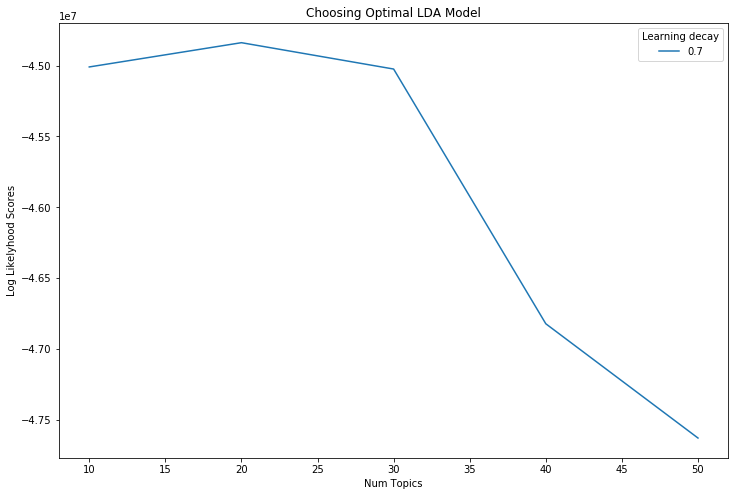

In [99]:
num_categories = 60

# Get Log Likelyhoods from Grid Search Output
n_topics = [i for i in xrange(10,num_categories,10)]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [103]:
#PyLDAvis visualitzation
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(best_lda_model, vectorized_documents, vectorizer, mds='mmds')

/home/centos/anaconda2/envs/exploration_python2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
11     12.816080        1       1  0.019115  0.060343
7       8.602257        1       2 -0.319818 -0.082167
12      6.332423        1       3 -0.048862  0.180585
1       5.867362        1       4 -0.124030 -0.257841
13      5.820579        1       5 -0.074525  0.325784
6       5.734599        1       6 -0.284130  0.131465
4       5.293430        1       7 -0.228809 -0.003240
3       5.250795        1       8 -0.233980 -0.208686
18      4.912503        1       9  0.042754 -0.324049
17      4.827816        1      10  0.049598 -0.211145
15      4.767017        1      11 -0.029545 -0.152431
0       4.509061        1      12  0.076342  0.262409
9       4.438230        1      13 -0.147957 -0.084227
16      4.409050        1      14  0.165381 -0.010603
19      3.370657        1      15 -0.230476  0.288778
8       3.017470        1      16  0.228570  0.244466
5       2.924203        1      17  0.230635 -0.245081
10      2.824805        1      18  0.259933 -0.087280
14      2.226191        1      19  0.354490  0.023456
2       2.055471        1      20  0.295316  0.149466, topic_info=      Category           Freq        Term          Total  loglift  logprob
term                                                                      
23622  Default  150752.000000       trump  150752.000000  30.0000  30.0000
4293   Default   54642.000000     clinton   54642.000000  29.0000  29.0000
17512  Default   31249.000000       polic   31249.000000  28.0000  28.0000
19823  Default  203202.000000        said  203202.000000  27.0000  27.0000
19073  Default   36181.000000  republican   36181.000000  26.0000  26.0000
17835  Default   66372.000000      presid   66372.000000  25.0000  25.0000
4578   Default   24899.000000     compani   24899.000000  24.0000  24.0000
23771  Default   25713.000000     twitter   25713.000000  23.0000  23.0000
24898  Default   25920.000000        vote   25920.000000  22.0000  22.0000
5911   Default   29424.000000    democrat   29424.000000  21.0000  21.0000
25534  Default   20857.000000       women   20857.000000  20.0000  20.0000
6558   Default   28903.000000      donald   28903.000000  19.0000  19.0000
3347   Default   35143.000000    campaign   35143.000000  18.0000  18.0000
21793  Default   77714.000000       state   77714.000000  17.0000  17.0000
15148  Default   54171.000000         mr.   54171.000000  16.0000  16.0000
5099   Default   18968.000000       court   18968.000000  15.0000  15.0000
17037  Default   16997.000000     percent   16997.000000  14.0000  14.0000
7092   Default   26501.000000       elect   26501.000000  13.0000  13.0000
15610  Default   34722.000000        news   34722.000000  12.0000  12.0000
10767  Default   33320.000000        hous   33320.000000  11.0000  11.0000
1395   Default   28613.000000      attack   28613.000000  10.0000  10.0000
11652  Default   20452.000000    investig   20452.000000   9.0000   9.0000
24901  Default   14600.000000       voter   14600.000000   8.0000   8.0000
10485  Default   19806.000000     hillari   19806.000000   7.0000   7.0000
20400  Default   18492.000000       senat   18492.000000   6.0000   6.0000
10247  Default   13321.000000      health   13321.000000   5.0000   5.0000
25742  Default   66719.000000        year   66719.000000   4.0000   4.0000
19043  Default   50347.000000      report   50347.000000   3.0000   3.0000
12935  Default   24985.000000         law   24985.000000   2.0000   2.0000
16099  Default   33169.000000       offic   33169.000000   1.0000   1.0000
...        ...            ...         ...            ...      ...      ...
22383  Topic20    1077.669710     surgeri    1329.652220   3.6745  -5.7793
23507  Topic20    2373.730569   treatment    3267.409094   3.5651  -4.9896
10247  Topic20    8060.219598      health   13321.370868   3.3822  -3.7672
14318  Topic20    1020.155198     medicin    1271.035240   3.6648  -5

In [ ]:
# Calculating topic probability per each doc 
lda_output = best_lda_model.transform(vectorized_documents)

In [125]:
# Priting dominant topic probabilities

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(data.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0,0.26,0,0,0,0.02,0,0.03,0,0,0,0.06,0,0,0,0,0.07,0.56,0.01,0,17
Doc1,0.06,0.04,0.02,0,0.02,0,0.44,0,0.05,0,0,0.14,0.18,0.01,0,0,0.03,0,0.01,0,6
Doc2,0.26,0.05,0,0.01,0,0,0,0,0.01,0.03,0.01,0.07,0.14,0.27,0,0.03,0.07,0,0,0.06,13
Doc3,0.06,0.02,0.03,0.07,0,0.1,0.01,0,0.02,0,0.01,0.12,0.03,0.49,0,0.02,0,0,0.01,0.01,13
Doc4,0,0.03,0,0.02,0,0,0,0.08,0,0.08,0.61,0,0,0,0.01,0.15,0,0,0,0,10
Doc5,0.16,0,0.1,0.07,0,0,0,0,0,0,0,0,0,0.61,0,0.06,0,0,0,0,13
Doc6,0.04,0,0.01,0.03,0.01,0,0.02,0.06,0,0.04,0,0,0,0.02,0,0.78,0,0,0,0,15
Doc7,0.02,0,0.05,0,0,0.05,0,0,0.03,0,0,0.23,0.15,0.02,0.4,0,0,0,0.05,0.01,14
Doc8,0.03,0.02,0,0.01,0.03,0.08,0,0,0,0,0,0.06,0.22,0.48,0.01,0,0.02,0,0,0.03,13
Doc9,0.14,0,0.1,0,0,0,0,0,0,0,0,0.09,0.45,0.11,0,0,0.11,0,0,0,12


## Topic summaritzation

In [106]:
from nltk import FreqDist

In [126]:
# Ading titles and content to dominant topic DF

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic["headline"] = data["title"].values
df_document_topic["content"] = data["content"].values
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic,headline,content
Doc0,0.00,0.26,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,...,0.00,0.00,0.00,0.07,0.56,0.01,0.00,17,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...
Doc1,0.06,0.04,0.02,0.00,0.02,0.00,0.44,0.00,0.05,0.00,...,0.01,0.00,0.00,0.03,0.00,0.01,0.00,6,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood..."
Doc2,0.26,0.05,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,...,0.27,0.00,0.03,0.07,0.00,0.00,0.06,13,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri..."
Doc3,0.06,0.02,0.03,0.07,0.00,0.10,0.01,0.00,0.02,0.00,...,0.49,0.00,0.02,0.00,0.00,0.01,0.01,13,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t..."
Doc4,0.00,0.03,0.00,0.02,0.00,0.00,0.00,0.08,0.00,0.08,...,0.00,0.01,0.15,0.00,0.00,0.00,0.00,10,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ..."
Doc5,0.16,0.00,0.10,0.07,0.00,0.00,0.00,0.00,0.00,0.00,...,0.61,0.00,0.06,0.00,0.00,0.00,0.00,13,"Sick With a Cold, Queen Elizabeth Misses New Y...","LONDON — Queen Elizabeth II, who has been b..."
Doc6,0.04,0.00,0.01,0.03,0.01,0.00,0.02,0.06,0.00,0.04,...,0.02,0.00,0.78,0.00,0.00,0.00,0.00,15,Taiwan’s President Accuses China of Renewed In...,BEIJING — President Tsai of Taiwan sharpl...
Doc7,0.02,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.03,0.00,...,0.02,0.40,0.00,0.00,0.00,0.05,0.01,14,"After ‘The Biggest Loser,’ Their Bodies Fought...","Danny Cahill stood, slightly dazed, in a blizz..."
Doc8,0.03,0.02,0.00,0.01,0.03,0.08,0.00,0.00,0.00,0.00,...,0.48,0.01,0.00,0.02,0.00,0.00,0.03,13,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ..."
Doc9,0.14,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.11,0.00,0.00,0.11,0.00,0.00,0.00,12,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...


## Computing Gold standard summaritzation based on headlines

In [128]:
# Obtaining summaritzation based in headlines (gold standard)
# 1- group docs by dominant topic
# 2- Obtain all headlines per doc
# 3- Obtain most common words for each topic, considering all headlines in each topic

concatenated_headlines = df_document_topic.groupby("dominant_topic")["headline"].apply(lambda x: " ".join(x)).to_frame()
print(concatenated_headlines.head())

for topic_id, headlines in enumerate(concatenated_headlines["headline"].values):
    common_tokens.append([token[0] for token in FreqDist(tokenize(headlines.decode('utf-8'))).most_common(20)]) 

df_topic_keywords = pd.DataFrame(common_tokens)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

                                                         headline
dominant_topic                                                   
0               As Second Avenue Subway Opens, a Train Delay E...
1               Dylann Roof Himself Rejects Best Defense Again...
2               After One-Child Policy, Outrage at China’s Off...
3               In Turkey, U.S. Hand Is Seen in Nearly Every C...
4               Trump Appears to Side With Assange Over Intell...


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,new,york,time,breitbart,california,migrant,flood,trump,hurrican,storm,fire,citi,dead,world,today,earthquak,say,kill,home,matthew
Topic 1,breitbart,trump,new,time,york,court,immigr,illeg,border,texa,ban,suprem,obama,judg,law,alien,case,order,deport,sanctuari
Topic 2,new,breitbart,time,york,plan,parenthood,drug,abort,cancer,zika,health,say,doctor,studi,women,babi,care,case,death,report
Topic 3,breitbart,trump,new,time,york,muslim,islam,milo,protest,christian,obama,pope,student,state,say,attack,univers,gay,ban,black
Topic 4,breitbart,trump,clinton,new,hillari,time,york,russia,email,comey,fbi,investig,russian,hous,hack,report,obama,say,white,campaign
Topic 5,breitbart,new,time,york,win,olymp,rio,game,nfl,team,player,open,trump,kaepernick,sport,final,world,play,nba,first
Topic 6,breitbart,polic,new,york,time,attack,kill,shoot,gun,man,suspect,arrest,offic,say,trump,texa,terror,shot,charg,protest
Topic 7,trump,breitbart,donald,new,clinton,time,york,hillari,cruz,obama,news,campaign,presid,debat,ted,gop,rubio,say,call,media
Topic 8,breitbart,new,time,york,trump,job,american,economi,market,rate,year,stock,report,fed,immigr,econom,u.s.,obama,worker,donald
Topic 9,new,time,york,breitbart,syria,isi,trump,state,islam,kill,attack,u.s.,iran,syrian,russia,say,obama,bomb,war,militari


## Computing baseline based on LDA word probability for each topic

In [129]:
# Show top n keywords for each topic based on topic/word probability
def show_topics(vectorizer=vectorized_documents, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)

# Defining baseline
baseline_top_terms = topic_keywords

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,citi,said,peopl,new,area,build,one,water,year,home,park,south,day,mani,resid,island,nation,town,hous,storm
Topic 1,court,state,law,immigr,case,feder,justic,judg,order,legal,said,breitbart,texa,illeg,border,rule,attorney,would,right,execut
Topic 2,women,health,drug,medic,said,abort,patient,doctor,care,hospit,dr.,peopl,case,children,diseas,cancer,treatment,death,report,men
Topic 3,muslim,islam,countri,peopl,group,nation,right,refuge,american,state,polit,protest,commun,christian,presid,america,support,speech,govern,also
Topic 4,said,investig,clinton,report,russian,russia,email,offici,fbi,intellig,presid,inform,hous,state,comey,depart,committe,secur,former,director
Topic 5,game,team,player,play,sport,first,win,olymp,year,season,said,final,two,time,athlet,second,last,footbal,one,world
Topic 6,polic,said,offic,attack,kill,report,gun,peopl,man,shoot,arrest,two,investig,one,death,accord,victim,citi,shot,told
Topic 7,trump,presid,said,donald,say,campaign,news,mr.,obama,twitter,republican,presidenti,cnn,breitbart,cruz,rubio,call,new,white,sen.
Topic 8,year,percent,rate,american,job,increas,number,worker,million,econom,report,market,economi,per,accord,countri,sinc,growth,price,last
Topic 9,said,isi,militari,state,attack,forc,syria,war,group,unit,iraq,iran,offici,syrian,secur,govern,terrorist,kill,islam,countri


## Data prediction

In [288]:
predict_data = ["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.", "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the American president's obsession with Clinton is the most concerning."]
predict_data

["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.",
 "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the America

In [298]:
predict_vectors = vectorizer.transform(predict_data)
predict_vectors_dense = predict_vectors.todense()
print("Sparsicity: ", ((predict_vectors_dense > 0).sum()/float(predict_vectors_dense.size))*100, "%")

Sparsicity:  1.0157367668097281 %


In [299]:
# Create Document - Topic Matrix
lda_output_predict = best_lda_model.transform(predict_vectors)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(predict_data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_predict, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.01,0.01,0.3,0.05,0.64,4
Doc1,0,0.6,0.39,0,0,1


In [297]:
lda_output_predict

array([[0.00584278, 0.00579862, 0.29725935, 0.04949993, 0.64159932],
       [0.0045556 , 0.59679783, 0.38939439, 0.00462492, 0.00462726]])